## Importing Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
df_go = pd.read_csv(r"E:\Machine Learning Project\archive_stock\GOOGL_2006-01-01_to_2018-01-01.csv")
df_ibm = pd.read_csv(r"E:\Machine Learning Project\archive_stock\IBM_2006-01-01_to_2018-01-01.csv")
df_msft = pd.read_csv(r"E:\Machine Learning Project\archive_stock\MSFT_2006-01-01_to_2018-01-01.csv")
df_amzn = pd.read_csv(r"E:\Machine Learning Project\archive_stock\AMZN_2006-01-01_to_2018-01-01.csv")

In [3]:
df_go

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
...,...,...,...,...,...,...,...
3014,2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL
3015,2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL
3016,2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL
3017,2017-12-28,1062.25,1064.84,1053.38,1055.95,994249,GOOGL


In [4]:
df_go_copy = df_go.copy()
df_ibm_copy = df_ibm.copy()
df_msft_copy = df_msft.copy()
df_amzn_copy = df_amzn.copy()

In [5]:
df_go_copy['Date'] = pd.to_datetime(df_go_copy['Date'])
df_ibm_copy['Date'] = pd.to_datetime(df_ibm_copy['Date'])
df_msft_copy['Date'] = pd.to_datetime(df_msft_copy['Date'])
df_amzn_copy['Date'] = pd.to_datetime(df_amzn_copy['Date'])

In [6]:
df_go_copy.set_index('Date', inplace = True)
df_ibm_copy.set_index('Date', inplace = True)
df_msft_copy.set_index('Date', inplace = True)
df_amzn_copy.set_index('Date', inplace = True)

In [7]:
df_go_copy = df_go_copy.asfreq('d', method = 'ffill')
df_ibm_copy = df_ibm_copy.asfreq('d', method = 'ffill')
df_msft_copy = df_msft_copy.asfreq('d', method = 'ffill')
df_amzn_copy = df_amzn_copy.asfreq('d', method = 'ffill')

In [8]:
df_go_copy.asfreq('d').isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [9]:
df_go_copy

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-07,228.66,235.49,226.85,233.06,17759521,GOOGL
...,...,...,...,...,...,...
2017-12-25,1070.00,1071.72,1067.64,1068.86,889446,GOOGL
2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL


In [10]:
df_go_copy['market_cap'] = df_go_copy['Open'] * df_go_copy['Volume']
df_ibm_copy['market_cap'] = df_ibm_copy['Open'] * df_ibm_copy['Volume']
df_msft_copy['market_cap'] = df_msft_copy['Open'] * df_msft_copy['Volume']
df_amzn_copy['market_cap'] = df_amzn_copy['Open'] * df_amzn_copy['Volume']


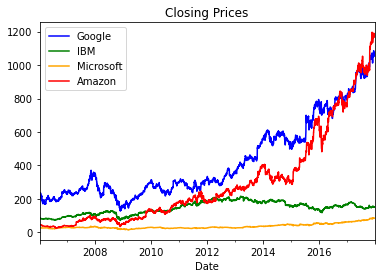

In [11]:
plt.rcParams['figure.figsize'] = [15, 9]
plt.rcParams.update({'font.size': 14})
df_go_copy['Close'].plot(color = 'blue', label = 'Google')
df_ibm_copy['Close'].plot(color = 'green', label = 'IBM')
df_msft_copy['Close'].plot(color = 'orange', label = 'Microsoft')
df_amzn_copy['Close'].plot(color = 'red', label = 'Amazon')

plt.title('Closing Prices')
plt.legend()
plt.show()

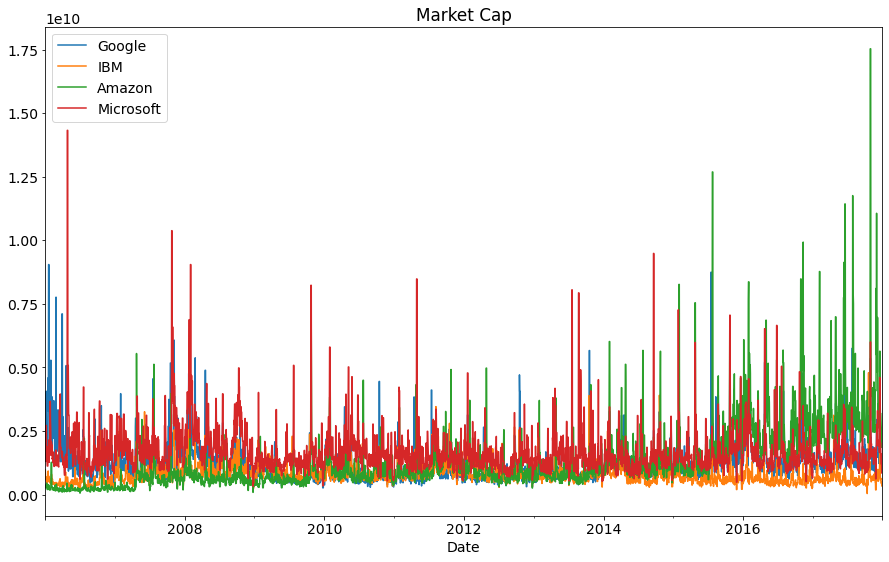

In [12]:
plt.rcParams['figure.figsize'] = [15, 9]
plt.rcParams.update({'font.size': 14})
df_go_copy['market_cap'].plot(label = 'Google')
df_ibm_copy['market_cap'].plot(label = 'IBM')
df_amzn_copy['market_cap'].plot(label = 'Amazon')
df_msft_copy['market_cap'].plot(label = 'Microsoft')

plt.title('Market Cap')
plt.legend()
plt.show()

In [13]:
def rolling_mean(col, dataframe, intervals):
    for i in range(len(intervals)):
        new_col = 'MA' + str(intervals[i])
        dataframe[new_col] = dataframe[col].rolling(intervals[i]).mean()
    return None
intervals = [10, 20, 50, 200]
rolling_mean('Close', df_go_copy, intervals)
rolling_mean('Close', df_ibm_copy, intervals )
rolling_mean('Close', df_amzn_copy, intervals )
rolling_mean('Close', df_msft_copy, intervals )




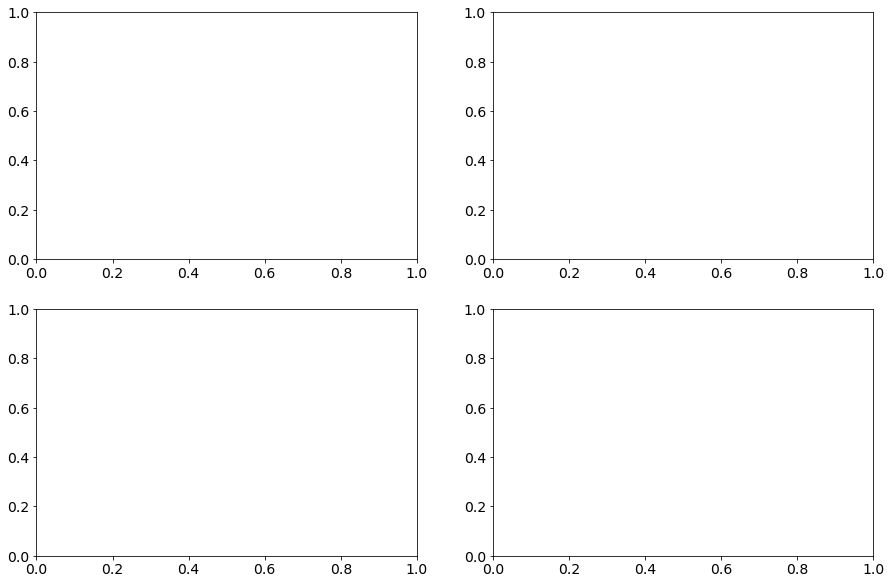

In [14]:

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

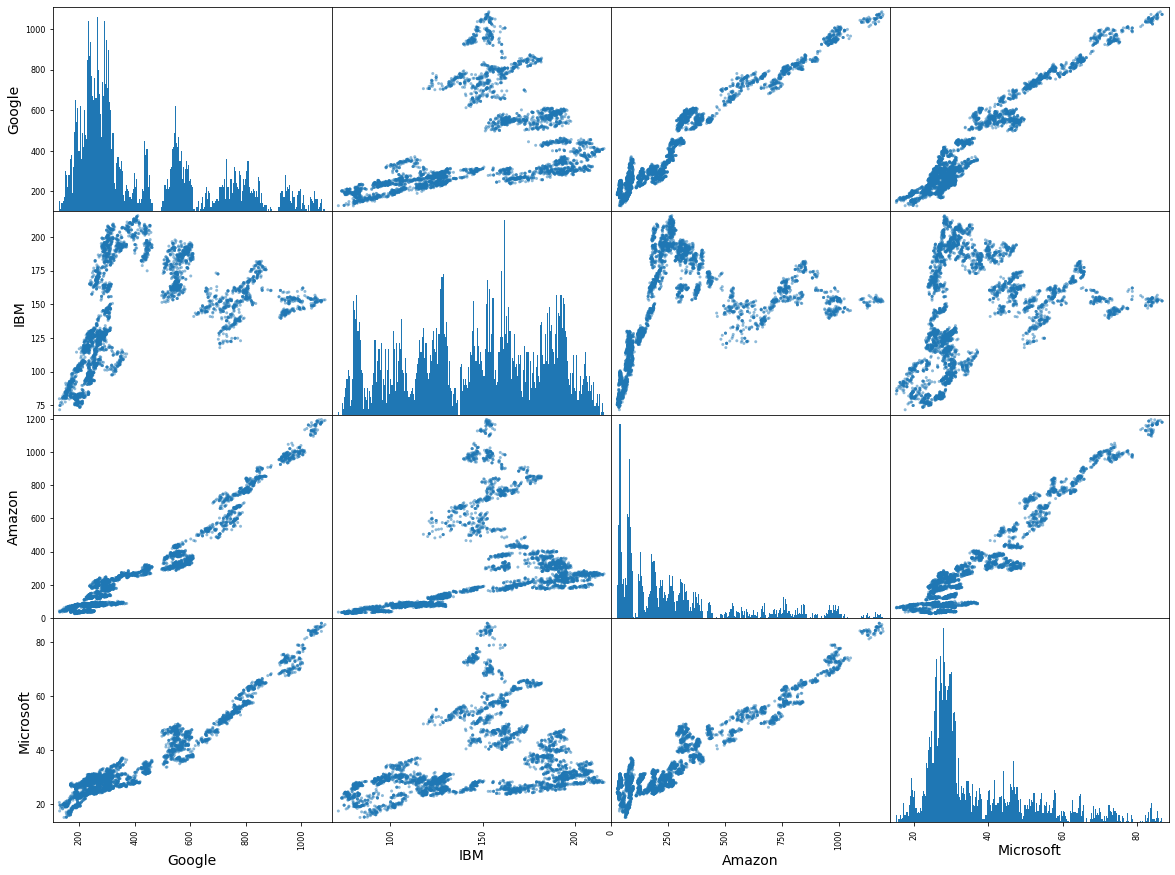

In [15]:
from pandas.plotting import scatter_matrix

data = pd.concat([df_go_copy['Close'],df_ibm_copy['Close'],df_amzn_copy['Close'], df_msft_copy['Close']],axis = 1)
data.columns = ['Google','IBM','Amazon', 'Microsoft']
scatter_matrix(data, figsize = (20,15), hist_kwds= {'bins':250})
plt.show()

In [16]:
df_go_copy['returns'] = (df_go_copy['Close']/df_go_copy['Close'].shift(1)) - 1
df_ibm_copy['returns'] = (df_ibm_copy['Close']/df_ibm_copy['Close'].shift(1)) - 1
df_amzn_copy['returns'] = (df_amzn_copy['Close']/df_amzn_copy['Close'].shift(1)) - 1
df_msft_copy['returns'] = (df_msft_copy['Close']/df_msft_copy['Close'].shift(1)) - 1


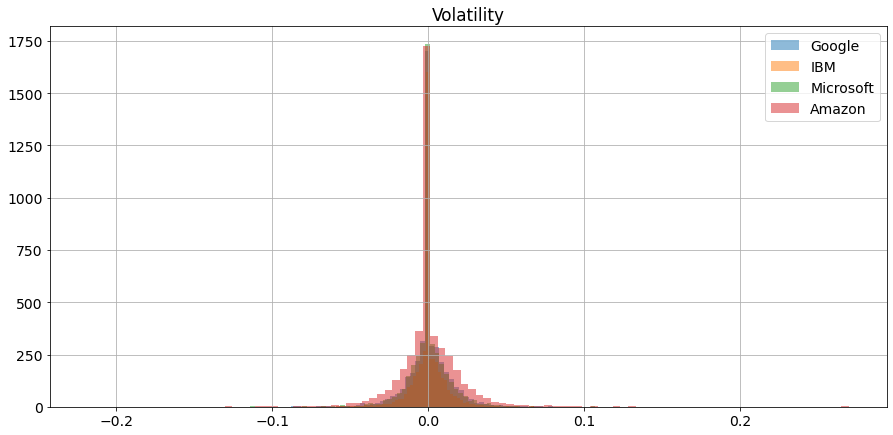

In [17]:
df_go_copy['returns'].hist(bins = 100, label = 'Google', alpha = 0.5, figsize = (15,7))
df_ibm_copy['returns'].hist(bins = 100, label = 'IBM', alpha = 0.5, figsize = (15,7))
df_msft_copy['returns'].hist(bins = 100, label = 'Microsoft', alpha = 0.5, figsize = (15,7))
df_amzn_copy['returns'].hist(bins = 100, label = 'Amazon', alpha = 0.5, figsize = (15,7))
plt.legend()
plt.title('Volatility')
plt.show()


In [18]:
df_go_copy['Close']

Date
2006-01-03     217.83
2006-01-04     222.84
2006-01-05     225.85
2006-01-06     233.06
2006-01-07     233.06
               ...   
2017-12-25    1068.86
2017-12-26    1065.85
2017-12-27    1060.20
2017-12-28    1055.95
2017-12-29    1053.40
Freq: D, Name: Close, Length: 4379, dtype: float64

In [19]:
from numpy import array

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [20]:
size = int(0.8 * len(df_go_copy['Close']))
train, test = df_go_copy['Close'][:size], df_go_copy['Close'][size:]

In [21]:
len(train)

3503

In [22]:
len(test)

876

In [23]:
raw_sequence = train
n_steps = 3

In [24]:
len(raw_sequence)

3503

In [25]:
X, y = split_sequence(raw_sequence, n_steps)
for i in range(len(X)):
    print(X[i], y[i])

[217.83 222.84 225.85] 233.06
[222.84 225.85 233.06] 233.06
[225.85 233.06 233.06] 233.06
[233.06 233.06 233.06] 233.68
[233.06 233.06 233.68] 235.11
[233.06 233.68 235.11] 236.05
[233.68 235.11 236.05] 232.05
[235.11 236.05 232.05] 233.36
[236.05 232.05 233.36] 233.36
[232.05 233.36 233.36] 233.36
[233.36 233.36 233.36] 233.36
[233.36 233.36 233.36] 233.79
[233.36 233.36 233.79] 222.68
[233.36 233.79 222.68] 218.44
[233.79 222.68 218.44] 199.93
[222.68 218.44 199.93] 199.93
[218.44 199.93 199.93] 199.93
[199.93 199.93 199.93] 213.96
[199.93 199.93 213.96] 221.74
[199.93 213.96 221.74] 216.72
[213.96 221.74 216.72] 217.35
[221.74 216.72 217.35] 216.96
[216.72 217.35 216.96] 216.96
[217.35 216.96 216.96] 216.96
[216.96 216.96 216.96] 213.62
[216.96 216.96 213.62] 216.55
[216.96 213.62 216.55] 201.09
[213.62 216.55 201.09] 198.22
[216.55 201.09 198.22] 190.97
[201.09 198.22 190.97] 190.97
[198.22 190.97 190.97] 190.97
[190.97 190.97 190.97] 192.74
[190.97 190.97 192.74] 184.14
[190.97 19

In [26]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


## Univaraite LSTM

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM 
from keras.models import Sequential
model = keras.Sequential()
model.add(LSTM(35, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, verbose=0)


In [28]:
X_test, y_test = split_sequence(test, 3)
for i in range(len(X_test)):
    print(X_test[i], y_test[i])


[664.39 664.39 664.39] 663.14
[664.39 664.39 663.14] 690.3
[664.39 663.14 690.3 ] 691.47
[663.14 690.3  691.47] 686.51
[690.3  691.47 686.51] 689.37
[691.47 686.51 689.37] 689.37
[686.51 689.37 689.37] 689.37
[689.37 689.37 689.37] 694.11
[689.37 689.37 694.11] 688.73
[689.37 694.11 688.73] 694.04
[694.11 688.73 694.04] 679.48
[688.73 694.04 679.48] 644.03
[694.04 679.48 644.03] 644.03
[679.48 644.03 644.03] 644.03
[644.03 644.03 644.03] 618.11
[644.03 644.03 618.11] 612.47
[644.03 618.11 612.47] 659.74
[618.11 612.47 659.74] 667.96
[612.47 659.74 667.96] 659.69
[659.74 667.96 659.69] 659.69
[667.96 659.69 659.69] 659.69
[659.69 659.69 659.69] 647.82
[659.69 659.69 647.82] 629.56
[659.69 647.82 629.56] 644.91
[647.82 629.56 644.91] 637.05
[629.56 644.91 637.05] 628.96
[644.91 637.05 628.96] 628.96
[637.05 628.96 628.96] 628.96
[628.96 628.96 628.96] 628.96
[628.96 628.96 628.96] 643.88
[628.96 628.96 643.88] 643.41
[628.96 643.88 643.41] 651.08
[643.88 643.41 651.08] 655.3
[643.41 651.

In [29]:
x_input = array([664.39, 664.39, 664.39])
x_input = x_input.reshape((1, n_steps, n_features))

In [30]:
model.predict(x_input)

1/1 [==============================] - 0s 207ms/step


array([[665.815]], dtype=float32)

In [31]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))


In [32]:
y_hat = model.predict(X_test)

28/28 [==============================] - 0s 2ms/step


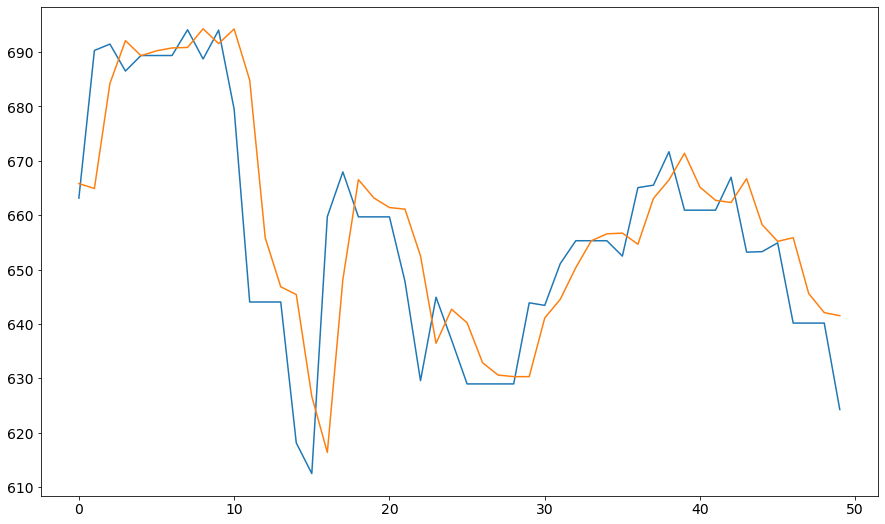

In [33]:
plt.plot(list(y_test)[:50], label = 'Actual')
plt.plot(list(y_hat)[:50], label = 'Prediction')

In [34]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_hat)
rmse = math.sqrt(mse)

In [35]:
print(rmse)

8.63159996863942


## Bidirectional LSTM

In [36]:
from keras.layers import Bidirectional

model = keras.Sequential()
model.add(Bidirectional(LSTM(35, activation='relu', input_shape=(n_steps, n_features))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, verbose=0)


In [37]:
y_hat_bidir = model.predict(X_test)

28/28 [==============================] - 0s 1ms/step


In [38]:
from sklearn.metrics import mean_squared_error
import math
mse_bidir = mean_squared_error(y_test, y_hat_bidir)
rmse_bidir = math.sqrt(mse_bidir)
rmse_bidir

8.974854837085509

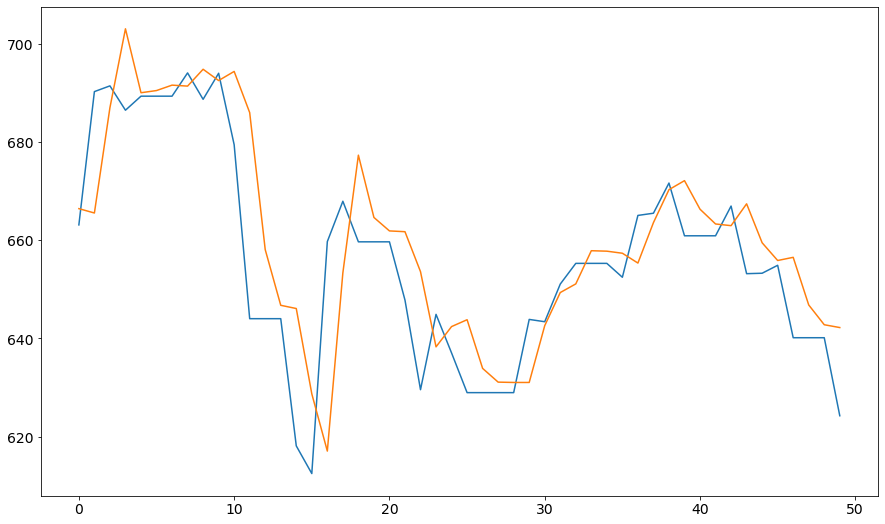

In [39]:
plt.plot(list(y_test)[:50])
plt.plot(list(y_hat_bidir)[:50])

## CNN LSTM

In [40]:
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_sequence, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))

In [41]:
X[:5]

array([[[[[217.83],
          [222.84]]],


        [[[225.85],
          [233.06]]]],



       [[[[222.84],
          [225.85]]],


        [[[233.06],
          [233.06]]]],



       [[[[225.85],
          [233.06]]],


        [[[233.06],
          [233.06]]]],



       [[[[233.06],
          [233.06]]],


        [[[233.06],
          [233.68]]]],



       [[[[233.06],
          [233.06]]],


        [[[233.68],
          [235.11]]]]])

In [42]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D


model = Sequential()
model.add(ConvLSTM2D(filters=80, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=500, verbose=0)


In [43]:
# choose a number of time steps
n_steps = 4
# split into samples
X_test, y_test = split_sequence(test, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 2
n_steps = 2
X_test = X_test.reshape((X_test.shape[0], n_seq, 1, n_steps, n_features))

In [44]:
X_test[:5]

array([[[[[664.39],
          [664.39]]],


        [[[664.39],
          [663.14]]]],



       [[[[664.39],
          [664.39]]],


        [[[663.14],
          [690.3 ]]]],



       [[[[664.39],
          [663.14]]],


        [[[690.3 ],
          [691.47]]]],



       [[[[663.14],
          [690.3 ]]],


        [[[691.47],
          [686.51]]]],



       [[[[690.3 ],
          [691.47]]],


        [[[686.51],
          [689.37]]]]])

In [45]:
y_hat_clstm = model.predict(X_test)

28/28 [==============================] - 0s 2ms/step


In [46]:

mse_clstm = mean_squared_error(y_test, y_hat_clstm)
rmse_clstm = math.sqrt(mse_clstm)

In [47]:
rmse_clstm

8.804114619627613

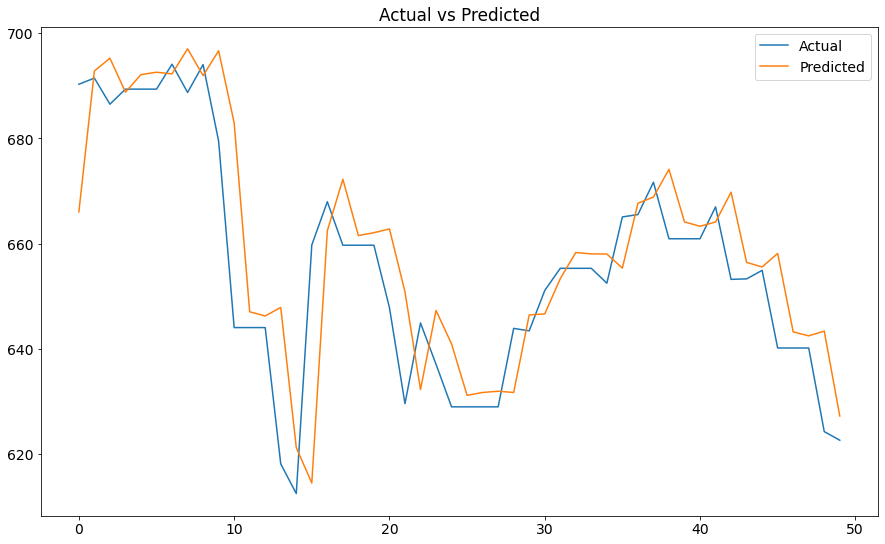

In [48]:
plt.plot(list(y_test)[:50], label = 'Actual')
plt.plot(list(y_hat_clstm)[:50], label = 'Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

In [49]:
data.corr()

,Google,IBM,Amazon,Microsoft
Google,1.000000,0.410572,0.972811,0.968857
IBM,0.410572,1.000000,0.395978,0.289181
Amazon,0.972811,0.395978,1.000000,0.953155
Microsoft,0.968857,0.289181,0.953155,1.000000
